In [90]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('data_copy.csv')

In [12]:
df.sample(frac=1) # shuffling the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2,1
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

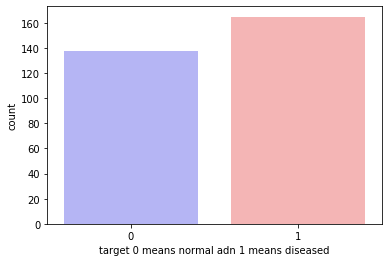

In [15]:
sns.countplot(x = 'target', data=df, palette='bwr')
plt.xlabel('target 0 means normal adn 1 means diseased')
plt.show()

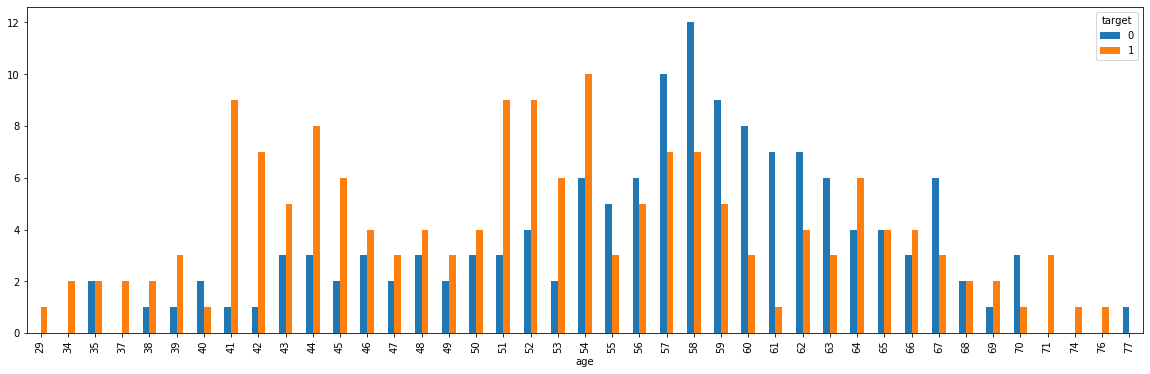

In [16]:
pd.crosstab(df.age, df.target).plot(kind='bar', figsize=(20, 6))
plt.show()

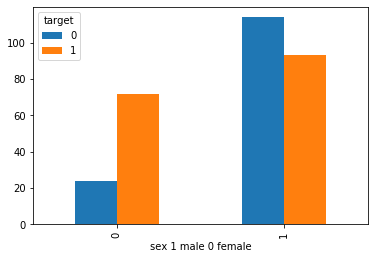

In [17]:
pd.crosstab(df.sex, df.target).plot(kind='bar')
plt.xlabel('sex 1 male 0 female')
plt.show()

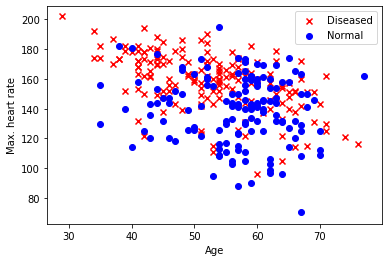

In [21]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[df.target == 1], marker='x', color='r')
plt.scatter(x=df.age[df.target==0], y=df.thalach[df.target == 0], marker='o', color='b')
plt.xlabel('Age')
plt.ylabel('Max. heart rate')
plt.legend(['Diseased', 'Normal'])
plt.show()

In [27]:
cp = pd.get_dummies(df['cp'], prefix='cp')
thal = pd.get_dummies(df['thal'], prefix='thal')
slope = pd.get_dummies(df['slope'], prefix='slope')

In [28]:
frames = [df, cp, thal, slope]
df = pd.concat(frames, axis=1)

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [31]:
df.drop(columns=['cp', 'thal', 'slope'])

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,...,0,0,0,0,0,0,1,0,1,0
299,45,1,110,264,0,1,132,0,1.2,0,...,0,0,1,0,0,0,1,0,1,0
300,68,1,144,193,1,1,141,0,3.4,2,...,0,0,0,0,0,0,1,0,1,0
301,57,1,130,131,0,1,115,1,1.2,1,...,0,0,0,0,0,0,1,0,1,0


In [55]:
X = df.drop(columns=['target'])
y = df['target']
# normalizing data
X = X/X.max()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)

(242, 24)
(242,)


In [75]:
## Logistic Regression Model START ##

In [57]:
l_reg = LogisticRegression()
l_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
acc = l_reg.score(X_test, y_test)*100
print("Logistic Regression ACCURACY is: " + str(acc.round(2)) + "%")

Logistic Regression ACCURACY is: 85.25%


In [76]:
## Logistic Regression Model END ##

In [77]:
## K-Nearest Neighbors Model START ##

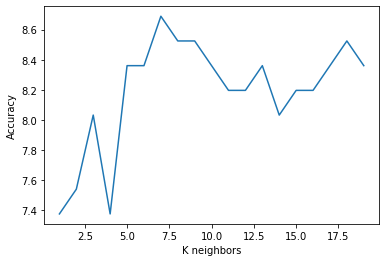

In [71]:
#choosing best k value
scores = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test)*10)
plt.plot(range(1, 20), scores)
plt.xlabel('K neighbors')
plt.ylabel('Accuracy')
plt.show()

In [73]:
max_acc = 0
for acc in scores:
    if acc > max_acc:
        max_acc = acc
print("Maximum KNN accuracy is " + str(round(max_acc*10, 2)) + "%")

Maximum KNN accuracy is 86.89%


In [78]:
## K-Nearest Neighbors Model END ##

In [79]:
## Support Vector Machine Model START ##

In [82]:
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
print("SVM accuracy is " + str(round(svm.score(X_test, y_test)*100, 2)) + "%")

SVM accuracy is 85.25%


In [84]:
## Support Vector Machine Model END ##

In [85]:
## Naive Bayes Model START ##

In [86]:
n_b = GaussianNB()
n_b.fit(X_train, y_train)
print("Naive Bayes accuracy is " + str(round(n_b.score(X_test, y_test)*100, 2)) + "%")

Naive Bayes accuracy is 81.97%


In [87]:
## Naive Bayes Model END ##

In [91]:
## Decision Tree Model START ##

In [93]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Decision Tree accuracy is " + str(round(dt.score(X_test, y_test)*100, 2)) + "%")

Decision Tree accuracy is 83.61%


In [94]:
## Decision Tree Model END ##